# Airplane Seats

An airplane has 20 seats numbered from 1 to 20, and each of 20 passengers has an assigned seat. Everyone queues up in a civil fashion except for one knucklehead, who pushes his way to the front of the line. Then, without even looking at his seat assignment, he boards and sits wherever he feels like sitting. Then the others board. If their assigned seats are open, they sit there; otherwise, they choose an open seat at random. 

What is the probability that the nth person's assigned seat is open?

In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

### Monte Carlo Solution

In [33]:
class airplane_seats():

    def __init__(self, seats=20):
        self.seats = seats
        self.probs = []
        
    def calc_prob(self, n, iters=1000):
        """Calculate probability that nth passenger's seat is open using
        Monte Carlo method"""
        
        assert n <= self.seats, "nth passenger exceeds number of seats"

        # add 1 if nth seat open, nothing if not
        times_open = 0
        
        for i in range(iters):
#             print("\nRound", i+1)
            taken_seats = set()
            
            # first passenger randomly chooses a seat
            first_seat = random.choice(range(1, self.seats+1))
            if first_seat == 1 or first_seat > n:
#                 print("Passenger 1 takes seat", first_seat)
#                 print(f"Seat {n} available")
                times_open += 1
                continue
            else:
                # print("Passenger 1 takes seat", first_seat)
                taken_seats.add(first_seat)
                
            # next passengers
            for seat in range(2, n):
                if seat in taken_seats:
                    taken = random.choice(range(seat+1, self.seats+1))
                else:
                    taken = seat
#                 print(f"Passenger {seat} takes seat {taken}")
                taken_seats.add(taken)
                    
            if n not in taken_seats:
                times_open += 1
#                 print(f"Seat {n} available")
#             else:
#                 print(f"Seat {n} taken")
                
        return times_open / iters

    
    def fit(self, iters=1000):
        """Calculates and stores probabilities for each nth passenger"""
    
        for i in range(1, self.seats+1):
            print(f"\rCalculating passenger {i} probability", end="")
            prob = self.calc_prob(i, iters=iters)
            self.probs.append(prob)
        
        print("\rDone!                         ")

    
    def print_probs(self):
        """Prints report of probabilities for each passenger"""
        
        if len(self.probs) == 0:
            print("Run self.fit() first")
            return None
        
        print("\t\tPROB")
        for i, prob in enumerate(self.probs, 1):
            print(f"Passenger{i}:\t{prob:.4f}")            

In [34]:
airplane_20 = airplane_seats()

In [35]:
airplane_20.fit(1000000)

Done!                         bility


In [36]:
airplane_20.print_probs()

		PROB
Passenger1:	1.0000
Passenger2:	0.9498
Passenger3:	0.9472
Passenger4:	0.9440
Passenger5:	0.9407
Passenger6:	0.9370
Passenger7:	0.9324
Passenger8:	0.9267
Passenger9:	0.9212
Passenger10:	0.9137
Passenger11:	0.9053
Passenger12:	0.8945
Passenger13:	0.8811
Passenger14:	0.8646
Passenger15:	0.8415
Passenger16:	0.8103
Passenger17:	0.7627
Passenger18:	0.6840
Passenger19:	0.5254
Passenger20:	0.0498


''

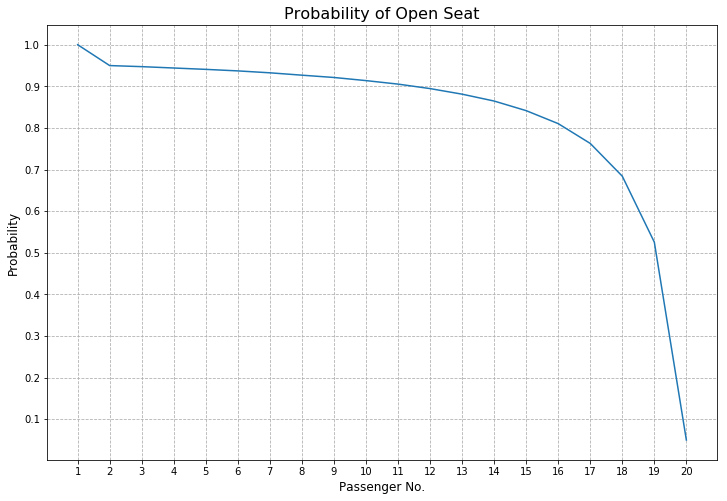

In [51]:
x = range(1,21)
y = airplane_20.probs

plt.figure(figsize=(12,8))
plt.plot(x, y)
plt.xticks(x)
plt.yticks([0.1*i for i in range(1,11)])
# plt.ylim([0,1])
plt.grid(linestyle='--')
plt.xlabel("Passenger No.", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.title("Probability of Open Seat", fontsize=16)
;

### Analytic Solution, Take 1

The first passenger's seat will always be free; this is clear enough:  
`P(1) = 1`

The second passenger's seat will be free as long as the first didn't sit in it:  
`P(2) = 1 - 1/20`

Now it starts to get tricky. The third passenger's seat will be free unless 1) P1 sits in S3, or 2) P1 sits in S2 and P2 sits in S3:  
`P(3) = 1 - 1/20 - (1/20 * 1/19)`

The fourth's will be free unless 1) P1 sits in S4, 2) P1 sits in S2 and P2 sits in S4, 3) P1 sits in S3 and P3 sits in S4, or 4) P1 sits in S2 and P2 sits in S3 and P3 sits in S4:  
`P(4) = 1 - 1/20 - (1/20 * 1/19) - (1/20 * 1/18) - (1/20 * 1/19 * 1/18)`

The fifth's will be free unless 1) P1 sits in S, 2) P1 sits in S2 and P2 sits in S5, 3) P1 sits in S3 and P3 sits in S5, 4) P1 sits in S4 and P4 sits in S5, 5) P1 sits in S2 and P2 sits in S3 and P3 sits in S5, 6) P1 sits in S2 and P2 sits in S4 and P4 sits in S5, 7) P1 sits in S3 and P3 sits in S4 and P4 sits in S5, 8) P1 sits in S2 and P2 sits in S3 and P3 sits in S4 and P4 sits in S5:  
`P(5) = 1 - 1/20 - (1/20 * 1/19) - (1/20 * 1/18) - (1/20 * 1/17) - (1/20 * 1/19 * 1/18) - (1/20 * 1/19 * 1/17) - (1/20 * 1/18 * 1/17) - (1/20 * 1/19 * 1/18 * 1/17)`  

Or perhaps more clearly written as:  
`P(5) = 1 - 1/20 * (1 + 1/19 + 1/18 + 1/17 + (1/19 * 1/18) + (1/19 * 1/17) + (1/18 * 1/17) + (1/19 * 1/18 * 1/17))`  

Now we see a pattern developing: one subtracts all the possible probability combinations that would lead to previous passengers occupying the nth seat. A quick check to see if this squares with the Monte Carlo solution...

In [173]:
# P2
1 - 1/20

0.95

In [174]:
# P3
1 - 1/20 - (1/20 * 1/19)

0.9473684210526315

In [175]:
# P4
1 - 1/20 - (1/20 * 1/19) - (1/20 * 1/18) - (1/20 * 1/19 * 1/18)

0.9444444444444444

In [179]:
# P5
(1 - 1/20 
   - (1/20 * 1/19) 
   - (1/20 * 1/18) 
   - (1/20 * 1/17) 
   - (1/20 * 1/19 * 1/18) 
   - (1/20 * 1/19 * 1/17) 
   - (1/20 * 1/18 * 1/17) 
   - (1/20 * 1/19 * 1/18 * 1/17)
)

0.9411764705882353

Incredibly close, but hard to tell at the beginning when the margins are so slim. Let's try with a smaller airplane... 

#### Five-seater Monte Carlo v. Analytic (v1)

In [194]:
airplane_5 = airplane_seats(5)

In [202]:
airplane_5.print_probs(1000000)

		PROB
Passenger1:	1.0000
Passenger2:	0.8004
Passenger3:	0.7333
Passenger4:	0.5998
Passenger5:	0.2000


In [196]:
# P2
1 - 1/5

0.8

In [199]:
# P3
1 - 1/5 - (1/5 * 1/4)

0.75

In [200]:
# P4
1 - 1/5 - (1/5 * 1/4) - (1/5 * 1/3) - (1/5 * 1/4 * 1/3)

0.6666666666666666

In [201]:
# P4
(1 - 1/5
   - (1/5 * 1/4)
   - (1/5 * 1/3)
   - (1/5 * 1/2)
   - (1/5 * 1/4 * 1/3)
   - (1/5 * 1/4 * 1/2)
   - (1/5 * 1/3 * 1/2)
   - (1/5 * 1/4 * 1/3 * 1/2)
)

0.49999999999999994

Not quite. Back to the drawing board... more coming soon!